In [1]:
from dataLoader import load_train_dataframe, load_test_dataframe
from processor import Processor
from constants import COLORS
from useDecisionTree import UseDecisionTree
from utils import get_avg_colors_one
import numpy as np
from evaluater import Evaluater

In [2]:
df=load_train_dataframe()

100%|██████████| 11/11 [00:01<00:00,  5.81it/s]


In [3]:
p=Processor()
tree=UseDecisionTree(COLORS,p,depth=7)
tree.fit(df)

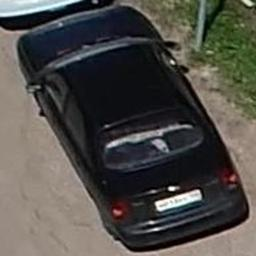

In [4]:
df.Image.iloc[5]

In [5]:
tree.predictOne(df.Image.iloc[5])

{'Green': 0.29533678756476683}

In [6]:
y=tree.predict(df.Image)
y_true=df.Target

In [7]:
import pandas as pd
from utils import to_dict_group_by
d=to_dict_group_by(pd.DataFrame({'predicted': y,'true':y_true}),'true','predicted')
e=Evaluater(d)
e.reportClasses()

,recall,precision,f1Score,count
Black,0.611940,0.793548,0.691011,402
Blue,0.830986,0.861314,0.845878,284
Brown,0.033333,1.000000,0.064516,150
Cyan,0.883895,0.778878,0.828070,267
Green,0.576208,0.504886,0.538194,269
Grey,0.534535,0.370062,0.437346,333
Orange,0.929982,0.836834,0.880952,557
Red,0.882129,0.842105,0.861653,526
Violet,0.644172,0.972222,0.774908,163
White,0.501217,0.529563,0.515000,411


In [18]:
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score

In [19]:
pd.DataFrame({
            'recall': recall_score(y_true,y,average='micro'),
            'precision': precision_score(y_true,y,average='weighted'),
            'f1Score_micro': f1_score(y_true,y,average='micro'),
            'f1Score_macro': f1_score(y_true,y,average='macro'),
            'accuracy': accuracy_score(y_true,y)
        },index=["sklearn"])

,recall,precision,f1Score_micro,f1Score_macro,accuracy
sklearn,0.711468,0.739104,0.711468,0.657551,0.711468


In [14]:
e.reportCommon()

,recall,precision,f1ScoreMicro,f1ScoreMacro
all_classes,0.711468,0.739104,0.702558,0.725023


In [9]:
brown=df[df.Target=="Brown"]["Image"]

{'Grey': 0.36613272311212813, 'White': 0.2242562929061785, 'Green': 0.11212814645308924, 'Brown': 0.10526315789473684}


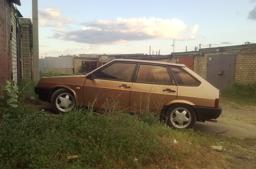

In [17]:
i=6
print(tree.predictOne(brown.iloc[i],top=4))
brown.iloc[i]